# Download Data

Download and begin cleaning raw data 

author: Maris

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import datetime as dt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/Users/maris/Documents/FE800')

In [4]:
sns.set_theme()
sns.set_palette("tab20")
sns.set_style("darkgrid", rc = {"grid.color": "white"})
c10 = sns.color_palette("tab10").as_hex()[:]
c20 = sns.color_palette("tab20").as_hex()[:]

In [5]:
pd.set_option('display.max_columns', None)

# ETF Data

In [6]:
hist = yf.download("LQD", "2018-07-01", "2023-07-01")
hist.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,114.410004,114.410004,114.160004,114.239998,95.802917,4806200
2018-07-03,114.309998,114.730003,114.309998,114.660004,96.155128,2518100
2018-07-05,114.769997,115.029999,114.750000,115.019997,96.456993,4730600
2018-07-06,115.239998,115.279999,115.089996,115.180000,96.591209,2465600
2018-07-09,115.089996,115.300003,115.029999,115.260002,96.658340,5161600


In [7]:
hist_SPY = yf.download("SPY", "2018-07-01", "2023-07-01")
hist_SPY.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,269.510010,272.040009,269.239990,271.859985,247.960022,63554800
2018-07-03,272.869995,272.980011,270.420013,270.899994,247.084351,42187100
2018-07-05,272.170013,273.179993,270.959991,273.109985,249.100098,56925900
2018-07-06,273.140015,275.839996,272.709991,275.420013,251.207031,66493700
2018-07-09,276.549988,277.959991,276.500000,277.899994,253.469009,50550400


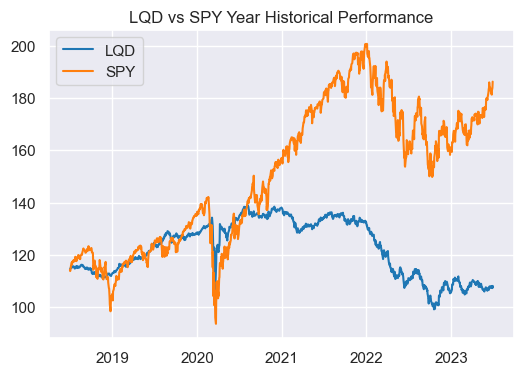

In [8]:
plt.figure(figsize = [6,4])
plt.plot(hist["Close"], label = "LQD", color = c20[0])
plt.plot(hist_SPY["Close"] * hist["Close"][0]/hist_SPY["Close"][0], label = "SPY", color = c20[2])
plt.title("LQD vs SPY Year Historical Performance")
plt.legend()
plt.show()

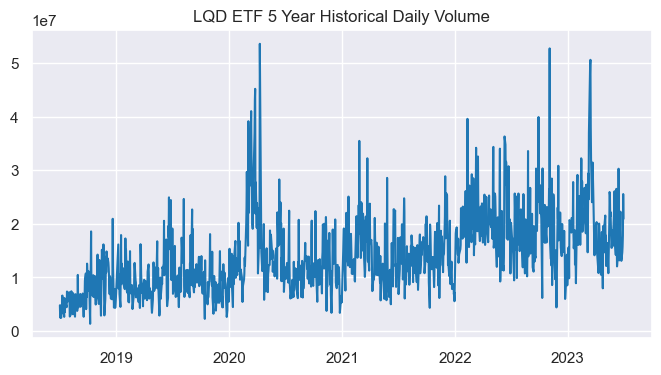

In [9]:
plt.figure(figsize = [8,4])
plt.plot(hist["Volume"])
plt.title("LQD ETF 5 Year Historical Daily Volume")
plt.show()

In [10]:
df_etfs = pd.DataFrame({"LQD": hist["Close"], "SPY": hist_SPY["Close"]})
df_etfs["LQD_return"] = df_etfs["LQD"].pct_change()
df_etfs["SPY_return"] = df_etfs["SPY"].pct_change()
df_etfs.head()

,LQD,SPY,LQD_return,SPY_return
Date,,,,
2018-07-02,114.239998,271.859985,NaN,NaN
2018-07-03,114.660004,270.899994,0.003677,-0.003531
2018-07-05,115.019997,273.109985,0.003140,0.008158
2018-07-06,115.180000,275.420013,0.001391,0.008458
2018-07-09,115.260002,277.899994,0.000695,0.009004


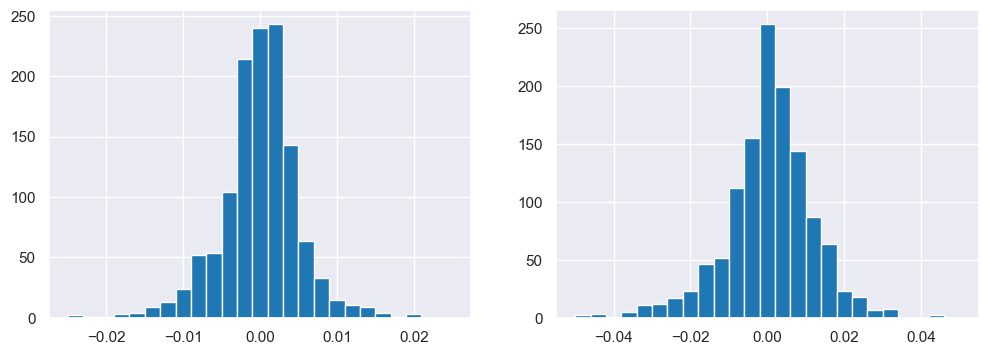

In [11]:
fig, ax = plt.subplots(1, 2, figsize = [12,4])
ax[0].hist(df_etfs["LQD_return"], bins = 25, range = [-.025, .025])
ax[1].hist(df_etfs["SPY_return"], bins = 25, range = [-.05, .05])
plt.show()

In [12]:
df_etfs[["LQD_return", "SPY_return"]].corr()

,LQD_return,SPY_return
LQD_return,1.000000,0.317936
SPY_return,0.317936,1.000000


In [13]:
df_etfs.to_pickle("df_etfs.pkl")

# LQD Holdings

In [14]:
df_LQD_09262023 = pd.read_csv('LQD_holdings-2.csv')
df_LQD_09262023.columns = ['Name', 'Sector', 'Asset_Class', 'Market_Value', 'Weight',
       'Notional', 'Par', 'CUSIP', 'ISIN', 'SEDOL', 'Price',
       'Location', 'Exchange', 'Currency', 'Duration', 'YTM', 'FX_Rate',
       'Maturity', 'Coupon', 'Mod_Duration', 'YTC',
       'YTW', 'Real_Duration', 'Real_YTM',
       'Market_Currency', 'Accrual_Date', 'Effective_Date']

In [15]:
df_LQD_09262023 = df_LQD_09262023.sort_values("Weight", ascending = False)
df_LQD_09262023 = df_LQD_09262023.drop(["SEDOL", "Exchange", "Currency", "Market_Currency"], axis = 1)
df_LQD_09262023 = df_LQD_09262023.reset_index().drop(["index"], axis = 1)
df_LQD_09262023.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,BLK CSH FND TREASURY SL AGENCY,Cash and/or Derivatives,Money Market,"117,460,000.23",0.39,"117,460,000.23","117,460,000.00",66922477,US0669224778,1.00,United States,0.03,5.11,1.0,-,5.34,0.04,-,5.11,0.04,5.11,-,4-Feb-09
1,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,United States,14.16,5.72,1.0,19-May-53,5.30,14.13,-,5.72,14.13,5.72,19-May-23,19-May-23
2,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,Belgium,12.67,5.80,1.0,1-Feb-46,4.90,12.78,-,5.80,12.78,5.80,1-Feb-19,13-May-19
3,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,United States,8.83,6.55,1.0,1-Oct-37,6.75,8.74,-,6.55,8.74,6.55,3-Oct-07,3-Oct-07
4,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,United States,12.87,6.38,1.0,25-Mar-48,5.05,12.92,-,6.38,12.92,6.38,9-Mar-18,9-Mar-18


In [16]:
df_LQD_09262023.groupby("Asset_Class").agg(["count", "sum"])[["Weight"]].sort_values(('Weight',   'sum'), ascending = False)

Weight       
              count    sum
Asset_Class               
Fixed Income   2685  99.84
Money Market      1   0.39
Cash              1  -0.08

In [17]:
df_LQD_09262023_notbond = pd.concat([df_LQD_09262023.iloc[0], 
                                     df_LQD_09262023.iloc[2686]], axis = 1).T.reset_index().drop(["index"], axis = 1)
df_LQD_09262023_notbond

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,BLK CSH FND TREASURY SL AGENCY,Cash and/or Derivatives,Money Market,"117,460,000.23",0.39,"117,460,000.23","117,460,000.00",66922477,US0669224778,1.0,United States,0.03,5.11,1.0,-,5.34,0.04,-,5.11,0.04,5.11,-,4-Feb-09
1,USD CASH,Cash and/or Derivatives,Cash,"-24,555,802.99",-0.08,"-24,555,802.99","-24,555,803.00",-,-,100.0,United States,0.0,5.34,1.0,-,0.0,0.0,-,5.34,0.0,5.34,-,1-Jan-89


In [18]:
df_LQD_09262023_bond = df_LQD_09262023.iloc[1:2686].reset_index().drop(["index"], axis = 1)
df_LQD_09262023_bond["Maturity"] = df_LQD_09262023_bond["Maturity"].apply(pd.Timestamp)
df_LQD_09262023_bond["Accrual_Date"] = df_LQD_09262023_bond["Accrual_Date"].apply(pd.Timestamp)
df_LQD_09262023_bond["Effective_Date"] = df_LQD_09262023_bond["Effective_Date"].apply(pd.Timestamp)
df_LQD_09262023_bond = df_LQD_09262023_bond.replace("Brokerage/Asset Managers/Exchanges", "Asset Managers")
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,United States,14.16,5.72,1.0,2053-05-19,5.30,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,Belgium,12.67,5.80,1.0,2046-02-01,4.90,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,United States,8.83,6.55,1.0,2037-10-01,6.75,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,United States,12.87,6.38,1.0,2048-03-25,5.05,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,United States,5.52,5.92,1.0,2030-04-15,3.88,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21


In [19]:
def add_100_years(date):
    if date.year >= 1900 and date.year <= 2022:
        return date + pd.DateOffset(years=100)
    return date

In [20]:
df_LQD_09262023_bond["Maturity"] = df_LQD_09262023_bond["Maturity"].apply(add_100_years)
df_LQD_09262023_bond["TTM"] = df_LQD_09262023_bond["Maturity"].apply(lambda x: 
                                                                     round((x - pd.Timestamp(dt.datetime.today().date())).days/365, 4))
df_LQD_09262023_bond["TFI"] = df_LQD_09262023_bond["Effective_Date"].apply(lambda x: 
                                                                     round((pd.Timestamp(dt.datetime.today().date()) - x).days/365, 4))
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date,TTM,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,United States,14.16,5.72,1.0,2053-05-19,5.30,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19,29.4329,0.5890
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,Belgium,12.67,5.80,1.0,2046-02-01,4.90,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13,22.1342,4.6082
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,United States,8.83,6.55,1.0,2037-10-01,6.75,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03,13.7918,16.2247
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,United States,12.87,6.38,1.0,2048-03-25,5.05,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09,24.2795,5.7863
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,United States,5.52,5.92,1.0,2030-04-15,3.88,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21,6.3233,2.5836


In [21]:
df_LQD_09262023_bond.groupby("Sector")[["Weight"]].agg(["count", "sum"]).sort_values(('Weight',   'sum'), ascending = False).T

Sector        Banking  Consumer Non-Cyclical  Communications  Technology  \
Weight count    509.0                 471.00          270.00       314.0   
       sum       24.4                  17.69           12.27        11.3   

Sector        Energy  Consumer Cyclical  Capital Goods  Insurance  Electric  \
Weight count  240.00             212.00         137.00     135.00    130.00   
       sum      7.94               6.91           4.42       4.18      3.33   

Sector        Basic Industry  Transportation  Asset Managers  Reits  \
Weight count           68.00           67.00           44.00  43.00   
       sum              2.06            1.78            1.33   1.02   

Sector        Finance Companies  Natural Gas  Owned No Guarantee  \
Weight count              17.00        15.00                8.00   
       sum                 0.59         0.34                0.11   

Sector        Utility Other  Industrial Other  
Weight count           3.00              2.00  
       sum             0.09              0.08

In [22]:
df_LQD_09262023_bond["TTM_Range"] = pd.cut(df_LQD_09262023_bond["TTM"], 
                                           [0, 3, 5, 7, 10, 15, 20, 100],
                                          labels = ["2-3 Years", "3-5 Years", "5-7 Years", "7-10 Years", 
                                                    "10-15 Years", "15-20 Years", "20+ Years"])
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date,TTM,TFI,TTM_Range
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,United States,14.16,5.72,1.0,2053-05-19,5.30,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19,29.4329,0.5890,20+ Years
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,Belgium,12.67,5.80,1.0,2046-02-01,4.90,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13,22.1342,4.6082,20+ Years
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,United States,8.83,6.55,1.0,2037-10-01,6.75,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03,13.7918,16.2247,10-15 Years
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,United States,12.87,6.38,1.0,2048-03-25,5.05,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09,24.2795,5.7863,20+ Years
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,United States,5.52,5.92,1.0,2030-04-15,3.88,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21,6.3233,2.5836,5-7 Years


In [23]:
bond_bloomberg = pd.read_csv("LQD_bloomberg.csv")
bond_bloomberg["Cusip"] = bond_bloomberg["Cusip"].apply(lambda x: x[:-5])
bond_bloomberg = bond_bloomberg.rename(columns = {"Sector" : "Sector_bad"}).dropna(how = "all", axis = 1)
bond_bloomberg.sort_values("Liquidity Score", ascending = False).head()

,Cusip,Amount Issued,Sector_bad,Moody Rating,S&P Rating,Fitch Rating,Liquidity Score
18,126650CX6,9000000000,"Consumer, Non-cyclical",Baa2,BBB,NaN,81.0
28,716973AC6,4000000000,"Consumer, Non-cyclical",A1,A+,Au,80.0
42,38141GYM0,4250000000,Financial,A2,BBB+,A,80.0
4,87264ABF1,7000000000,Communications,Baa2,BBB,BBB+,80.0
16,06051GHD4,5989208000,Financial,A1,A-,AA-,80.0


In [24]:
df_characteristics = pd.concat([df_LQD_09262023_bond, bond_bloomberg], axis = 1)
df_characteristics = df_characteristics[["Name", "CUSIP", "Maturity", "TTM", "Coupon", "Weight", "Notional", "Par", 
                                         "Amount Issued", "Sector", "Location", "Accrual_Date", "Effective_Date",
                                         "Moody Rating", "S&P Rating", "Fitch Rating", "Liquidity Score", "TTM_Range", "TFI"]]
df_characteristics.columns = ["Name", "Cusip", "Maturity", "TTM", "Coupon", "Weight", "Notional", "Par", 
                              "Amount_Issued", "Industry", "Location", "Accrual_Date", "Effective_Date",
                              "Moody_Rating", "S&P_Rating", "Fitch_Rating", "Liquidity_Score", "TTM_Range", "TFI"]
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.4329,5.30,0.30,"89,007,554.69","92,844,000.00",6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,Au,67.0,20+ Years,0.5890
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.1342,4.90,0.28,"83,824,691.11","93,649,000.00",9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,WD,75.0,20+ Years,4.6082
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,"75,296,859.48","71,627,000.00",5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.2795,5.05,0.22,"63,965,861.13","76,499,000.00",8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,NaN,73.0,20+ Years,5.7863
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.3233,3.88,0.21,"62,092,244.65","68,427,000.00",7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.5836


In [25]:
def clean_rating(x):
    try:
        if ("*" in x):
            return x[:-3]
        if ("u" in x):
            return x[:-1]
        elif (x == "WR") | (x == "WD") | (x == ""):
            return "None"
        else:
            return x
    except:
        return "None"

In [26]:
df_characteristics["Moody_Rating"] = df_characteristics["Moody_Rating"].apply(clean_rating)
df_characteristics["S&P_Rating"] = df_characteristics["S&P_Rating"].apply(clean_rating)
df_characteristics["Fitch_Rating"] = df_characteristics["Fitch_Rating"].apply(clean_rating)
df_characteristics = df_characteristics.replace("Ba", "Ba1")
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.4329,5.30,0.30,"89,007,554.69","92,844,000.00",6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.5890
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.1342,4.90,0.28,"83,824,691.11","93,649,000.00",9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.6082
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,"75,296,859.48","71,627,000.00",5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.2795,5.05,0.22,"63,965,861.13","76,499,000.00",8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.7863
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.3233,3.88,0.21,"62,092,244.65","68,427,000.00",7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.5836


In [27]:
df_characteristics["Notional"] = df_characteristics["Notional"].apply(lambda x: float(x.replace(",", "")))
df_characteristics["Par"] = df_characteristics["Par"].apply(lambda x: float(x.replace(",", "")))
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.4329,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.5890
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.1342,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.6082
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.2795,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.7863
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.3233,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.5836


In [28]:
def clean_company(x):
    
    ignore = ["Mtn", "Inc", "In", "(Fx-Frn)", "Co", "Sa", "Corp",  "(The)", "Plc", "Dac", "Ltd", "Llc", "C"
              "(Fx-Fx)", "Na", "Pty", "L", "(Usa)", "Lp", "Fin", "Caym", "144A", "/", "Aerca", "Fxd-Frn", 
              "(Fxd-Frn)", "Corp/The", "O", "Limited", "Cor", "Corpo", "Compan", "Ll", "Ua", "Ag", "Emc",
              "Holdin", "Nv", "Inc.", "Lux", "Bv", "Iii", "Sca", "(Min", "Pte", "Pte.", "Ire", "Sau", 
              "Internationa", "Fina", "Credit", "Op"]

    substrings = [ele for ele in ignore if (ele in x)]

    l = [i for i in x.split(" ") if (i not in substrings)]

    x = " ".join(l)    
    return x

In [29]:
df_characteristics["Company"] = df_characteristics["Name"].apply(lambda x: clean_company(x.title()))
df_characteristics["Company"] = df_characteristics["Company"].replace(["Anheuser-Busch Inbev Finance", "Anheuser-Busch Inbev Worldwide", "Anheuser-Busch Companies"], "Anheuser-Busch")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Ascension Health Alliance"], "Ascension Health")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Astrazeneca Finance"], "Astrazeneca")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Barrick North America Finance", "Barrick Pd Australia Finance"], "Barrick Finance")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Berkshire Hathaway Energy", "Berkshire Hathaway Finance"], "Berkshire Hathaway")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Bp Capital Markets America"], "Bp Capital Markets")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Broadcom Corp/Broadcom Cayman", "Broadcom Corporation/Broadcom"], "Broadcom")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Cheniere Energy Partners"], "Cheniere Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Chevron Usa"], "Chevron")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Citibank", "Citigroup"], "Citi")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Citizens Financial Group"], "Citizens Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Deere &", "John Deere Capital"], "Deere & Company")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Credit Suisse (New York Branch)"], "Credit Suisse")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Deutsche Bank (New York Branch)", "Deutsche Bank (Ny Branch) Fxd-F"], "Deutsche Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Devon Energy Corporation"], "Devon Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Dh Europe Finance Ii Sarl"], "Danaher Corporation")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Discover Bank"], "Discover Financial Services")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Duke Energy Florida", "Duke Energy Carolinas"], "Duke Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Energy Transfer Operating", "Energy Transfer Partners"], "Energy Transfer")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Fidelity National Information Serv"], "Fidelity National Information Services")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Ge Capital International Funding C", "Ge Healthcare Technologies"], "General Electric")
df_characteristics["Company"] = df_characteristics["Company"].replace(["General Motors Financial"], "General Motors")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Goldman Sachs Capital I", "Goldman Sachs Group Inc/The", "Goldman Sachs Group", "Goldman Sachs Group Inc/The Frn","Goldman Sachs Group Inc/The Fx-Frn"], "Goldman Sachs")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Huntington Bancshares", "Huntington National Bank"], "Huntington Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Jefferies Financial Group"], "Jefferies Group")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Jpmorgan Chase &", "Jpmorgan Chase & Fxd"], "Jpmorgan Chase")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Kaiser Foundation Hospitals"], "Kaiser Permanente")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Kinder Morgan Energy Partners"], "Kinder Morgan")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Keybank National Association"], "Keycorp")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Lockheed Martin Corporation"], "Lockheed Martin")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Massachusetts Institute Of Technol"], "Massachusetts Institute Of Technology")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Merck &"], "Merck")
df_characteristics["Company"] = df_characteristics["Company"].replace(["National Australia Bank (New Y"], "National Australia Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Nxp Nxp Funding Nxp Usa"], "Nxp")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pacific Gas And Electric Company"], "Pacific Gas And Electric")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pfizer Investment Enterprises"], "Pfizer")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pnc Financial Services Group ("], "Pnc Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Rio Tinto Alcan", "Rio Tinto Finance"], "Rio Tinto")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Santander Holdings Usa", "Santander Uk Group Holdings", "Banco Santander", "Banco Santander (Fx-Fx)"], "Santander")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Southern California Edison Company"], "Southern California Edison")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Targa Resources Partners"], "Targa Resources")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Telefonica Europe"], "Telefonica Emisiones")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Time Warner Entertainment Cmpny"], "Time Warner Cable")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Toronto-Dominion Bank/The"], "Toronto-Dominion Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Truist Financial"], "Truist Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Ubs (London Branch)", "Ubs Group"], "Ubs")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Virginia Elec & Power"], "Virginia Electric And Power")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Wells Fargo &", "Wells Fargo & Company", "Wells Fargo & Company Fx-Frn", "Wells Fargo & Company(Fx-Frn)", "Wells Fargo Bank"], "Wells Fargo")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Western Midstream Operating"], "Western Midstream")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Shell International Finance"], "Royal Dutch Shell")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Telefonica Emisiones"], "Telefonica")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Gsk Consumer Healthcare Capital Us", "Glaxosmithkline Capital"], "Glaxosmithkline")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Unilever Capital"], "Unilever")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Unilever Capital"], "Unilever")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Bat Capital", "Bat International Finance"], "British American Tobacco")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Sunoco Logistics Partners Operatio"], "Sunoco")
df_characteristics["Company"] = df_characteristics["Company"].replace(["American Honda Finance Corporation"], "Honda Motor")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Manufacturers And Traders Trust", "M&T Bank Corporation"], "M&T Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Twdc Enterprises 18"], "Walt Disney")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pacific Gas And Electric", "Pacific Gas & Electric Utilities"], "PG&E")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Caterpillar Financial Services"], "Caterpillar")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Exelon Corporation", "Exelon Generation", "Commonwealth Edison Company"], "Exelon")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Cheniere Corpus Christi Holdings", "Cheniere Energy"], "Cheniere")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Northern States Power Company", "Public Service Company Of Colorado"], "Xcel Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Medtronic Global Holdings"], "Medtronic")
df_characteristics["Company"] = df_characteristics["Company"].replace(["San Diego Gas & Electric"], "Sempra")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Virginia Electric And Power"], "Dominion Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Connecticut Light And Power"], "Eversource Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Chubb Ina Holdings"], "Chubb")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Mylan"], "Viatris")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Midamerican Energy Company", "Pacificorp"], "Berkshire Hathaway")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Aetna"], "Cvs Health")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Time Warner Cable", "Charter Communications Operating"], "Charter Communications")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Suisse (New York Branch)"], "Credit Suisse")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Mercedes-Benz Finance North Americ"], "Mercedes-Benz")




In [30]:
df_characteristics[df_characteristics["Company"].str.contains("Goldman")]

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247,Goldman Sachs
38,GOLDMAN SACHS GROUP INC/THE FRN,38141GYM0,2027-10-21,3.8384,1.95,0.12,35725536.41,40109000.0,5923231000,Banking,United States,2021-10-21,2021-10-21,Baa2,BBB,BBB+,53.0,3-5 Years,2.1644,Goldman Sachs
50,GOLDMAN SACHS GROUP INC/THE,38141GWZ3,2029-05-01,5.3671,4.22,0.11,31787177.94,33674000.0,4988336000,Banking,United States,2018-04-23,2018-04-23,Baa3,BBB-,BBB-,72.0,5-7 Years,5.6630,Goldman Sachs
51,GOLDMAN SACHS GROUP INC/THE,38141GZM9,2033-02-24,9.1890,3.10,0.11,31939173.30,39706000.0,4250000000,Banking,United States,2022-01-24,2022-01-24,A1,BBB+,A+,61.0,7-10 Years,1.9041,Goldman Sachs
67,GOLDMAN SACHS GROUP INC (FXD-FRN),38141GZR8,2028-03-15,4.2384,3.62,0.10,29298222.98,31677000.0,2978841000,Banking,United States,2022-03-15,2022-03-15,A1,AA-,None,63.0,3-5 Years,1.7671,Goldman Sachs
73,GOLDMAN SACHS GROUP INC/THE,38141GYB4,2032-04-22,8.3452,2.62,0.10,29129920.62,36581000.0,3000000000,Banking,United States,2021-04-22,2021-04-22,Baa2,BBB-,BBB-,54.0,7-10 Years,2.6630,Goldman Sachs
87,GOLDMAN SACHS GROUP INC/THE,38141GGM0,2041-02-01,17.1315,6.25,0.10,30927724.40,30380000.0,3250000000,Banking,United States,2011-01-28,2011-01-28,A2,BBB+,A,72.0,15-20 Years,12.9014,Goldman Sachs
97,GOLDMAN SACHS GROUP INC/THE,38141GYJ7,2032-07-21,8.5918,2.38,0.10,29888985.42,38833000.0,3541381000,Banking,United States,2021-07-21,2021-07-21,Baa1,BBB+,BBB,25.0,7-10 Years,2.4164,Goldman Sachs
99,GOLDMAN SACHS GROUP INC/THE FX-FRN,38141GZK3,2028-02-24,4.1836,2.64,0.09,25989206.38,28996000.0,3000000000,Banking,United States,2022-01-24,2022-01-24,A1,A-,A+,63.0,3-5 Years,1.9041,Goldman Sachs
157,GOLDMAN SACHS GROUP INC/THE,38141GWV2,2029-04-23,5.3452,3.81,0.08,22523625.36,24287000.0,2750000000,Banking,United States,2018-01-23,2018-01-23,A2,BBB+,A,70.0,5-7 Years,5.9096,Goldman Sachs


# Stock Data

In [31]:
df_companies = pd.DataFrame({"Company": df_characteristics["Company"].unique()})
df_companies.head()

,Company
0,Pfizer
1,Anheuser-Busch
2,Goldman Sachs
3,Cvs Health
4,T-Mobile Usa


In [32]:
df_companies["Ticker"] = ["PFE", "BUD", "GS", "CVS", "TMUS", "DTEGY", "BA", None, "BTGOF", "T", "WFC", "ABBV", "BAC", "ORAN", 
                          "C", "JPM", "MSFT", "GSK", "AZN", "AMGN", "MS", "VZ", None, "AAPL", "CMCSA", "RTX", "CI", "AMZN", 
                          "SHEL", "ALLY", "HD", "BMY", "ORCL", "LYG", "V", "AER", "TEF", "HSBC", "CNC", "META", "IBM", "CHTR",
                          None, "SMFG", "FI", "CSCO", "MBGYY", "PCG", "WMT", "LUV", "ABT", "MO", "BCS", "TD", "KHC", "VOD", 
                          "AVGO", "RABO.AS", "HCA", "XOM", "BRK-B", "UNH", "GILD", "PM", "VLO", "BP","SAN", "MA", "TRP", "ING", 
                          "GE", "DB", "MFG", "DIS", "DD", "CNQ", "UPS", "NWG", "ENB", "TFC", "DELL", "PNC", "FOXA", "OXY", "BTI", 
                          "BHP", "REYN", "PEP", "KVUE", "USB", "SHW", "LNG", "INTC", "DE", "MUFG", "UBS", "NEE", "ET", "AMT", "GPN","HLN",
                          "TAK", "RCI", "GM", "UL", "PSX", "COP", "BDX", "CAT", "MPC", "CE", "PYPL", "GOOGL", "WMB", "RY", 
                          "NOC", "WEBNF", "CS", "CARR", "KMI", "CRM", "EQH", "BKNG", "PARA", "SU", "EQIX", "BKR", "LOW", "EQT", "JNJ", 
                          "FCX", "TM", "KO", "TRV", "JEF", "ICE", "WES", "MRK", "D", "SO", "DOW", "NKE", "NMR", "WAB", "QCOM", 
                          "MMC", "TMO", "TTE", "NDAQ", "OTIS", "AON", "CCI", "LHX", "PRU", "AXP", "OKE", "NVDA", "HPQ", None, "MT", 
                          "TRGP", None, "GIS", "TAP", "LRCX", "HAL", "LVS", "MCD", "FITB", "KDP", "PWR", "COST", "DVN", "MU", "TGT", 
                          "SRE", "BAX", "FANG", "VICI", "MDT", "LMT", "BXP", "NI", "RELX", "VTRS", "MPLX", "PLD", "MET", "RRX", "ELV", 
                          "JBSAY", "NEM", "HON", "KLAC", "FPL", "RIO", "GOLD", "DUK", "AWK", "DG", "WM", "UNP", "ATH-PA", "EPD", "KGHI", 
                          "HMC", "WDAY", "SPGI", "PH", "NFLX", "LLY", "EMR", "BAM", "GPJA", "GD", "ARE", "REGN", "NSC", 
                          "EIX", "HES", "BNS", "ADBE", "PG", "VMW", "EXPE", "TXN", "TSN", "HPE", "SUN", "SCHW", "SYY", "BIIB", 
                          "AES", "CAG", "CB", "CVX", "NXPI", "ED", "FDX", "EBAY", "ES", "CP", "MRO", "NVS", "CSX", "ETN", "CRBG", "LDOS", 
                          "ITW", "SBUX", "CDW", "SPG", "HUM", "PAA", "ADM", "TDY", "DLR", "MAR", "INTU", "RPRX", "MTB", "SLB", "DISCA", 
                          "TT", "FIS", "MFC", "EXC", "CAH", "CF", "GLP", None, "ADI", "PEAK", "SWK", "ADP", "COF", "DFS", "DLTR", "MMM", 
                          "EQNR", "O", "DEO", "CBRE", "EFX", "MSI", "WTW", "STZ", "ZTS", "RSG", "WY", "COR", "BR", "ADSK", "ROP", "CME",
                          "ENBL", "CPB", "EMRAF", "BG", "AMAT", "BCE", "NTR", "BMO", "WRK", "APH", "AGR", "QRVO", "GLW", "NTRS", "AZO", 
                          "KEY", "AIG", "ARCC", "APD", "BSX", "LYB", "CLR", "CNP", None, None, "MDLZ", "WELL", "RJF", "OBDC", "KMB",
                          "NABZY", "MKC", "EOG", "CEG", "APTV", "AMCR", "DGX", "BX", None, "DHR", "CM", "AMP", "CMI", "HRL", None, "EG", 
                          "PXD", None, "XEL", "HR", "HAS", "HBAN", "SYK", "MRVL", "BRX", "CVE", "WCN", "VMC", "UHS", "FSK", "MLM", "ZBH", 
                          "OVV", "DTE", "CNI", "VFC", "RVTY", "PPL", "WBA", "ATVI", "ORLY", "PGR", "ECL", "KR", "MMP", "CFG", "IFF", None, 
                          "ACGL", "AEE", "TJX", "BK", "LH", "STT", "AL", "BHF", "BBAR", "SYF", "BWA", "EMN", "ALL", "EVRG", "NGG", "FRFHF", 
                          "TU", "AEP", "ATO", "ETR", "PRSC", "PEG", "HIG", "OMC"]

In [33]:
df_companies[df_companies["Ticker"] == "DT"] #REYN

,Company,Ticker


In [34]:
df_companies[df_companies["Ticker"].isna()]

,Company,Ticker
7,Warnermedia Holdings,None
22,Sprint Capital Corporation,None
42,Wyeth,None
158,Burlington Northern Santa Fe,None
161,Sabine Pass Liquefaction,None
270,Massachusetts Institute Of Technology,None
318,Commonspirit Health,None
319,Lyb International Finance,None
333,Ventas Realty,None
339,Erp Operating,None


In [35]:
df_companies["Sector"] = ["Health Care", "Consumer Staples", "Financials", "Health Care", "Communications", "Communications", "Industrials","Communications", 
     "Communications", "Communications", "Financials", "Health Care", "Financials", "Communications", "Financials", "Financials",  
     "Technology", "Health Care", "Health Care", "Health Care", "Financials", "Communications", "Communications", "Technology",
     "Consumer Discretionary", "Industrials", "Health Care", "Consumer Discretionary", "Energy", "Financials", "Consumer Discretionary",  
     "Health Care", "Technology", "Financials", "Technology", "Financials", "Communications", "Financials", "Health Care", 
     "Technology", "Technology", "Communications", "Health Care", "Financials", "Technology", "Technology", "Consumer Discretionary",
     "Utilities", "Consumer Discretionary", "Industrials", "Health Care", "Consumer Staples", "Financials", "Financials", "Consumer Staples",
     "Communications", "Technology", "Financials", "Health Care", "Energy", "Financials", "Health Care", "Health Care", "Consumer Staples", 
     "Energy", "Energy", "Financials", "Technology", "Energy", "Financials", "Industrials",  "Financials", "Financials", "Consumer Discretionary",
     "Materials", "Energy", "Industrials", "Financials", "Energy", "Financials", "Technology", "Financials",  "Communications",  
     "Energy", "Consumer Staples", "Materials", "Consumer Staples", "Consumer Staples", "Health Care", "Financials", "Materials", "Energy", 
     "Technology", "Industrials", "Financials", "Financials", "Utilities", "Energy", "Real Estate", "Technology", "Financials", 
     "Health Care", "Communications", "Consumer Discretionary", "Consumer Staples", "Energy", "Energy", "Health Care", "Industrials",  
     "Energy", "Materials", "Technology", "Communications", "Energy", "Financials", "Industrials", "Financials", "Financials", "Industrials",
     "Energy", "Technology", "Financials", "Consumer Discretionary", "Consumer Discretionary", "Energy", "Real Estate", "Energy",
     "Consumer Discretionary", "Energy", "Health Care", "Materials", "Consumer Discretionary", "Consumer Staples", "Financials", "Financials",
     "Financials", "Energy", "Health Care", "Utilities", "Utilities", "Materials", "Consumer Discretionary", "Financials", "Industrials",
     "Technology", "Financials", "Health Care", "Energy", "Financials", "Industrials", "Financials", "Real Estate", "Industrials", "Financials",
     "Financials", "Energy", "Technology", "Technology", "Industrials", "Materials", "Energy", "Energy", "Consumer Staples",
     "Consumer Staples", "Technology", "Energy", "Consumer Discretionary", "Consumer Discretionary", "Financials", "Consumer Staples",  
     "Industrials", "Consumer Discretionary", "Energy", "Technology", "Consumer Discretionary", "Utilities", "Health Care", "Energy",  
     "Real Estate", "Health Care", "Industrials", "Real Estate", "Utilities", "Consumer Discretionary", "Health Care", "Energy", "Real Estate",
     "Financials", "Consumer Discretionary", "Health Care", "Consumer Staples", "Materials", "Industrials", "Technology", "Utilities", "Materials", "Materials",  
     "Utilities", "Utilities", "Consumer Discretionary", "Industrials", "Industrials", "Financials", "Energy", "Health Care", "Consumer Discretionary", 
     "Technology", "Financials", "Industrials", "Communications", "Health Care", "Industrials", "Financials", "Utilities", "Industrials",
     "Real Estate", "Health Care", "Industrials", "Utilities", "Energy", "Financials", "Technology", "Consumer Staples", "Technology",
     "Consumer Discretionary", "Technology", "Consumer Staples", "Technology", "Energy", "Financials", "Consumer Staples", "Health Care",
     "Utilities", "Consumer Staples", "Financials", "Energy", "Technology", "Utilities", "Industrials", "Consumer Discretionary", "Utilities",
     "Industrials", "Energy", "Health Care", "Industrials", "Industrials", "Financials", "Technology", "Industrials", "Consumer Discretionary",
     "Technology", "Real Estate", "Health Care", "Energy", "Consumer Staples", "Technology", "Real Estate", "Consumer Discretionary",
     "Technology", "Health Care", "Financials", "Energy", "Communications", "Industrials", "Technology", "Financials",
     "Utilities", "Health Care", "Materials", "Real Estate", "Technology", "Technology", "Real Estate", "Industrials", "Technology", "Financials",
     "Financials", "Consumer Discretionary", "Industrials", "Energy", "Real Estate", "Consumer Staples", "Real Estate", "Technology", "Technology",
     "Financials", "Consumer Staples", "Health Care",  "Industrials",  "Real Estate",  "Health Care", "Technology",  "Technology", "Industrials",
     "Financials", "Energy", "Consumer Staples", "Utilities", "Consumer Staples", "Technology", "Communications", "Materials", "Financials", 
     "Real Estate", "Technology", "Utilities", "Technology", "Technology", "Financials", "Consumer Discretionary", "Financials", "Financials",
     "Financials", "Materials", "Health Care", "Materials", "Energy", "Utilities", "Health Care", "Technology", "Consumer Staples",
     "Real Estate", "Financials", "Financials", "Consumer Staples", "Financials", "Consumer Staples", "Energy", "Energy", "Consumer Discretionary", 
     "Materials", "Health Care", "Financials", "Real Estate", "Health Care", "Financials", "Financials", "Industrials",  "Consumer Staples", 
     "Technology", "Financials", "Energy", "Health Care", "Utilities", "Real Estate", "Consumer Discretionary", "Financials", "Health Care",
     "Technology", "Real Estate", "Energy", "Industrials", "Materials", "Health Care", "Financials", "Materials", "Health Care", 
     "Energy", "Utilities", "Industrials", "Consumer Discretionary", "Health Care", "Utilities", "Consumer Staples", "Communications",
     "Consumer Discretionary", "Financials", "Materials", "Consumer Staples", "Energy", "Financials", "Materials", "Health Care", "Financials", 
     "Utilities", "Consumer Discretionary", "Financials", "Health Care", "Financials", "Industrials", "Financials", "Financials", "Financials", 
     "Consumer Discretionary", "Materials", "Financials", "Utilities", "Utilities", "Financials", "Communications", "Utilities", "Utilities", 
     "Utilities", "Health Care", "Utilities", "Financials", "Communications"]

In [36]:
df_companies.head()

,Company,Ticker,Sector
0,Pfizer,PFE,Health Care
1,Anheuser-Busch,BUD,Consumer Staples
2,Goldman Sachs,GS,Financials
3,Cvs Health,CVS,Health Care
4,T-Mobile Usa,TMUS,Communications


In [37]:
df_characteristics["Ticker"] = df_characteristics["Company"].apply(lambda x: df_companies[df_companies["Company"] == x]["Ticker"].values[0])
df_characteristics["Sector"] = df_characteristics["Company"].apply(lambda x: df_companies[df_companies["Company"] == x]["Sector"].values[0])
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company,Ticker,Sector
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.4329,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.5890,Pfizer,PFE,Health Care
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.1342,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.6082,Anheuser-Busch,BUD,Consumer Staples
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247,Goldman Sachs,GS,Financials
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.2795,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.7863,Cvs Health,CVS,Health Care
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.3233,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.5836,T-Mobile Usa,TMUS,Communications


In [38]:
sectors = pd.DataFrame(df_characteristics["Sector"].unique()).rename(columns = {0: "Sector"})
sectors.index = ["XLF", "XLV", "XLK", "XLY", "XLE", "XLI", "XLP", "XLC", "XLU", "XLRE", "XLB"]
sectors

,Sector
XLF,Health Care
XLV,Consumer Staples
XLK,Financials
XLY,Communications
XLE,Industrials
XLI,Technology
XLP,Consumer Discretionary
XLC,Energy
XLU,Utilities
XLRE,Materials


In [39]:
sector_dict = sectors.to_dict()["Sector"]
sector_dict

{'XLF': 'Health Care',
 'XLV': 'Consumer Staples',
 'XLK': 'Financials',
 'XLY': 'Communications',
 'XLE': 'Industrials',
 'XLI': 'Technology',
 'XLP': 'Consumer Discretionary',
 'XLC': 'Energy',
 'XLU': 'Utilities',
 'XLRE': 'Materials',
 'XLB': 'Real Estate'}

In [40]:
def get_key(val, dict):
    for key, value in dict.items():
        if val == value:
            return key

In [41]:
df_characteristics["Sector Ticker"] = df_characteristics["Sector"].apply(lambda x: get_key(x, sector_dict))
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company,Ticker,Sector,Sector Ticker
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.4329,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.5890,Pfizer,PFE,Health Care,XLF
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.1342,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.6082,Anheuser-Busch,BUD,Consumer Staples,XLV
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247,Goldman Sachs,GS,Financials,XLK
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.2795,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.7863,Cvs Health,CVS,Health Care,XLF
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.3233,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.5836,T-Mobile Usa,TMUS,Communications,XLY


In [42]:
df_characteristics.to_pickle("df_characteristics.pkl")

In [43]:
df_stocks = yf.download(list(df_companies["Ticker"].dropna()), "2018-07-01", "2023-07-01")
df_stocks.head()

[*********************100%%**********************]  385 of 385 completed


8 Failed downloads:
['PRSC', 'CLR', 'DISCA', 'CS', 'ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
['ATVI', 'MMP']: Exception('%ticker%: No data found, symbol may be delisted')
['RABO.AS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Adj Close                                               \
                          AAPL       ABBV        ABT       ACGL        ADBE   
Date                                                                          
2018-07-02 00:00:00  44.601742  72.200844  55.612392  26.629999  243.259995   
2018-07-03 00:00:00  43.824959  72.588570  55.439182  26.760000  242.009995   
2018-07-05 00:00:00  44.177616  73.263191  55.913254  26.930000  244.179993   
2018-07-06 00:00:00  44.790009  75.155266  56.669933  27.280001  248.190002   
2018-07-09 00:00:00  45.411919  75.248299  56.925205  27.889999  249.770004   

                                                                              \
                           ADI        ADM         ADP        ADSK        AEE   
Date                                                                           
2018-07-02 00:00:00  86.700470  39.027897  120.220169  131.899994  52.755184   
2018-07-03 00:00:00  85.080070  39.398937  119.150406  131.600006  52.763790   
2018-07-05 00:00:00  86.781479  39.985699  119.195000  132.800003  53.039547   
2018-07-06 00:00:00  87.501648  40.304966  119.649643  135.110001  53.453186   
2018-07-09 00:00:00  87.483635  40.788166  119.917053  134.970001  51.678013   

                                                                            \
                           AEP        AER        AES        AGR        AIG   
Date                                                                         
2018-07-02 00:00:00  57.899612  53.770000  11.096851  42.949413  45.763733   
2018-07-03 00:00:00  58.271561  54.139999  10.987063  43.103035  46.029602   
2018-07-05 00:00:00  58.792271  54.480000  10.953286  43.394100  46.244015   
2018-07-06 00:00:00  59.147675  54.590000  10.978620  43.766033  46.629951   
2018-07-09 00:00:00  56.924267  55.349998  10.666150  42.221733  47.650551   

                                                                           \
                            AL        ALL       ALLY       AMAT      AMCR   
Date                                                                        
2018-07-02 00:00:00  37.819267  80.174446  22.660576  42.707478  8.176135   
2018-07-03 00:00:00  37.954811  80.375610  22.575609  41.884739  7.903598   
2018-07-05 00:00:00  38.207855  80.410591  22.771038  42.483089  8.082697   
2018-07-06 00:00:00  38.117485  80.602997  22.898485  43.128189  8.137204   
2018-07-09 00:00:00  38.894650  81.862411  23.552727  43.492821  8.137204   

                                                                    \
                           AMGN         AMP         AMT       AMZN   
Date                                                                 
2018-07-02 00:00:00  156.854797  125.273605  128.505890  85.689003   
2018-07-03 00:00:00  157.210342  123.824089  127.049110  84.697998   
2018-07-05 00:00:00  158.607147  125.362549  129.394150  84.986504   
2018-07-06 00:00:00  161.696960  125.993927  129.518509  85.531502   
2018-07-09 00:00:00  164.372055  129.622177  126.294052  86.950996   

                                                                             \
                            AON         APD        APH       APTV      ARCC   
Date                                                                          
2018-07-02 00:00:00  130.580261  137.692078  41.208138  90.947884  9.700125   
2018-07-03 00:00:00  130.418457  137.258179  41.018917  89.724052  9.700125   
2018-07-05 00:00:00  131.503082  137.957703  41.539272  91.855873  9.723710   
2018-07-06 00:00:00  132.835022  138.710434  41.719040  93.030365  9.729606   
2018-07-09 00:00:00  135.603653  139.817307  42.277248  94.283791  9.770885   

                                                                               \
                            ARE ATH-PA        ATO ATVI        AVGO        AWK   
Date                                                                            
2018-07-02 00:00:00  107.354980    NaN  79.224190  NaN  201.426056  

In [44]:
df_close = df_stocks["Adj Close"]
df_close.head()

,AAPL,ABBV,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AER,AES,AGR,AIG,AL,ALL,ALLY,AMAT,AMCR,AMGN,AMP,AMT,AMZN,AON,APD,APH,APTV,ARCC,ARE,ATH-PA,ATO,ATVI,AVGO,AWK,AXP,AZN,AZO,BA,BAC,BAM,BAX,BBAR,BCE,BCS,BDX,BG,BHF,BHP,BIIB,BK,BKNG,BKR,BMO,BMY,BNS,BP,BR,BRK-B,BRX,BSX,BTGOF,BTI,BUD,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBRE,CCI,CDW,CE,CEG,CF,CFG,CHTR,CI,CLR,CM,CMCSA,CME,CMI,CNC,CNI,CNP,CNQ,COF,COP,COR,COST,CP,CPB,CRBG,CRM,CS,CSCO,CSX,CVE,CVS,CVX,D,DB,DD,DE,DELL,DEO,DFS,DG,DGX,DHR,DIS,DISCA,DLR,DLTR,DOW,DTE,DTEGY,DUK,DVN,EBAY,ECL,ED,EFX,EG,EIX,ELV,EMN,EMR,EMRAF,ENB,ENBL,EOG,EPD,EQH,EQIX,EQNR,EQT,ES,ET,ETN,ETR,EVRG,EXC,EXPE,FANG,FCX,FDX,FI,FIS,FITB,FOXA,FPL,FRFHF,FSK,GD,GE,GILD,GIS,GLP,GLW,GM,GOLD,GOOGL,GPJA,GPN,GS,GSK,HAL,HAS,HBAN,HCA,HD,HES,HIG,HLN,HMC,HON,HPE,HPQ,HR,HRL,HSBC,HUM,IBM,ICE,IFF,ING,INTC,INTU,ITW,JBSAY,JEF,JNJ,JPM,KDP,KEY,KGHI,KHC,KLAC,KMB,KMI,KO,KR,KVUE,LDOS,LH,LHX,LLY,LMT,LNG,LOW,LRCX,LUV,LVS,LYB,LYG,MA,MAR,MBGYY,MCD,MDLZ,MDT,MET,META,MFC,MFG,MKC,MLM,MMC,MMM,MMP,MO,MPC,MPLX,MRK,MRO,MRVL,MS,MSFT,MSI,MT,MTB,MU,MUFG,NABZY,NDAQ,NEE,NEM,NFLX,NGG,NI,NKE,NMR,NOC,NSC,NTR,NTRS,NVDA,NVS,NWG,NXPI,O,OBDC,OKE,OMC,ORAN,ORCL,ORLY,OTIS,OVV,OXY,PAA,PARA,PCG,PEAK,PEG,PEP,PFE,PG,PGR,PH,PLD,PM,PNC,PPL,PRSC,PRU,PSX,PWR,PXD,PYPL,QCOM,QRVO,RABO.AS,RCI,REGN,RELX,REYN,RIO,RJF,ROP,RPRX,RRX,RSG,RTX,RVTY,RY,SAN,SBUX,SCHW,SHEL,SHW,SLB,SMFG,SO,SPG,SPGI,SRE,STT,STZ,SU,SUN,SWK,SYF,SYK,SYY,T,TAK,TAP,TD,TDY,TEF,TFC,TGT,TJX,TM,TMO,TMUS,TRGP,TRP,TRV,TSN,TT,TTE,TU,TXN,UBS,UHS,UL,UNH,UNP,UPS,USB,V,VFC,VICI,VLO,VMC,VMW,VOD,VTRS,VZ,WAB,WBA,WCN,WDAY,WEBNF,WELL,WES,WFC,WM,WMB,WMT,WRK,WTW,WY,XEL,XOM,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-02 00:00:00,44.601742,72.200844,55.612392,26.629999,243.259995,86.700470,39.027897,120.220169,131.899994,52.755184,57.899612,53.770000,11.096851,42.949413,45.763733,37.819267,80.174446,22.660576,42.707478,8.176135,156.854797,125.273605,128.505890,85.689003,130.580261,137.692078,41.208138,90.947884,9.700125,107.354980,NaN,79.224190,NaN,201.426056,78.494125,91.516800,30.145596,667.809998,323.468475,24.780365,NaN,67.555031,10.343262,30.568256,8.183775,216.404648,58.587536,40.779999,33.283806,295.769989,46.011017,2047.939941,27.854952,62.445957,46.347691,42.985516,33.344822,105.351120,187.830002,12.981394,32.830002,2.256670,33.624817,93.191269,34.792694,26.310446,99.711426,55.240463,29.215530,40.918034,NaN,119.165627,113.926292,47.660000,87.991203,77.394600,98.541451,NaN,37.831615,30.968122,293.910004,160.336624,NaN,33.495625,29.394480,137.342728,113.535805,62.029999,77.036064,23.248535,26.075249,84.798805,56.824329,78.776680,193.782257,34.407223,33.759380,NaN,140.429993,NaN,36.256538,19.961168,9.563187,55.618462,97.814636,54.111237,9.925508,83.916939,130.550018,24.525501,125.000122,62.499866,92.931717,98.535706,84.839470,102.101189,NaN,91.857635,84.029999,NaN,74.327171,13.884381,63.499226,33.030369,33.777134,132.140015,63.994843,118.063354,202.170853,51.096523,223.154617,82.728035,60.221085,26.021774,25.396416,NaN,97.866943,18.064869,17.768911,387.671234,19.183727,28.220682,49.917339,10.456986,66.693558,66.080544,46.567131,25.443941,119.364227,107.502281,16.047596,209.899139,74.739998,96.809715,23.672703,NaN,6.236233,496.831055,14.120545,164.047714,77.931519,57.315857,35.980419,9.724355,23.645315,36.108765,11.521673,57.105499,NaN,109.252472,196.790314,30.855711,40.146706,77.206970,11.430474,98.059212,169.647644,59.533058,44.934933,NaN,25.641832,123.974159,12.321817,19.165396,14.861290,32.437164,35.659328,288.052917,102.344032,68.582329,106.991272,10.707233,43.244995,197.716782,121.732918,3.780373,17.025473,104.819801,89.180161,17.730158,15.419221,7.252,48.008629,94.549194,87.2

In [45]:
first_non_null_values = {}
for column in df_close.columns:
    first_non_null_index = df_close[column].first_valid_index()
    if first_non_null_index is not None:
        first_non_null_values[column] = df_close.at[first_non_null_index, column]

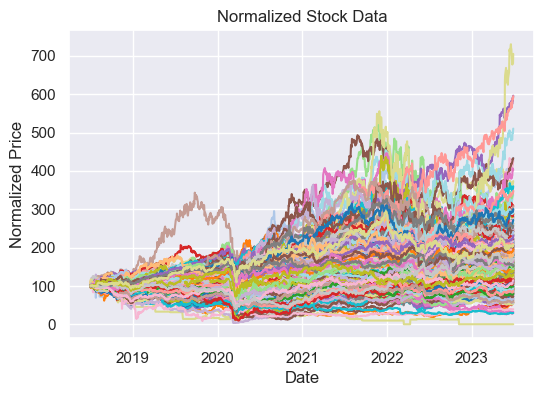

In [46]:
df_stocks_normalized = df_close.dropna(axis = 1, how = "all") / first_non_null_values.values() * 100
plt.figure(figsize = [6,4])
for i in range(len(df_stocks_normalized.columns)):
    plt.plot(df_stocks_normalized.index, df_stocks_normalized[df_stocks_normalized.columns[i]], c = c20[(i+1)%20])
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title("Normalized Stock Data")
plt.show()

In [47]:
df_close.to_pickle("df_close.pkl")

In [48]:
df_volume = df_stocks["Volume"].dropna(axis = 1, how = "all")
df_volume.to_pickle("df_volume.pkl")

In [49]:
df_sector_etfs = yf.download(list(sector_dict.keys()),start="2018-07-01", end="2023-07-01")["Adj Close"]
df_sector_etfs.head()

[*********************100%%**********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-07-02,51.456398,47.442150,57.155605,23.849771,64.987640,66.052322,44.194374,26.972099,43.868820,76.132576,103.608330
2018-07-03,51.367298,46.861504,57.514648,23.635553,64.779427,65.270119,44.297886,27.129688,43.994556,76.314468,103.087685
2018-07-05,51.812740,47.575424,57.453526,23.689112,65.096291,66.193687,44.910389,27.486326,44.229282,77.105606,103.598877
2018-07-06,52.071098,48.327408,57.804939,23.805141,65.322601,66.966438,45.048405,27.602440,44.572998,78.215057,104.412979
2018-07-09,52.534336,48.603455,58.668156,24.349623,66.535622,67.475327,44.875874,27.345327,43.198170,78.787956,105.662506


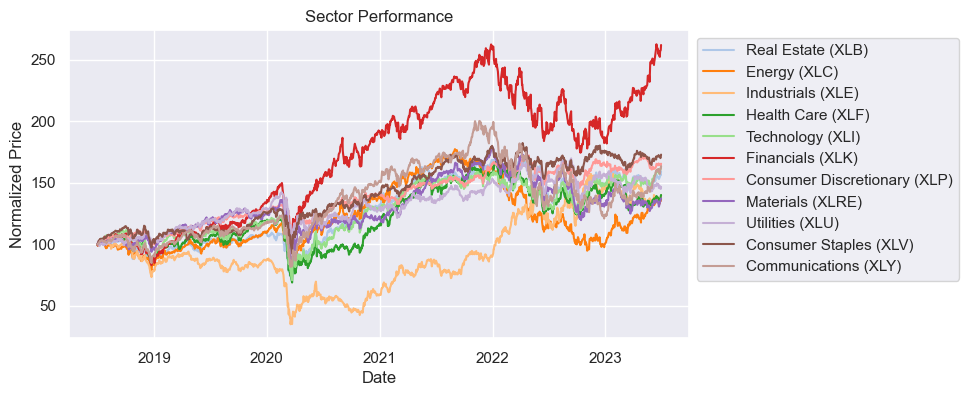

In [50]:
normalized_etf = df_sector_etfs / df_sector_etfs.iloc[0] * 100
plt.figure(figsize = [8,4])
for i in range(len(normalized_etf.columns)):
    plt.plot(normalized_etf.index, normalized_etf[normalized_etf.columns[i]], c = c20[i+1], 
             label = sector_dict[normalized_etf.columns[i]] + " (" + normalized_etf.columns[i] + ")")
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title("Sector Performance")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [51]:
df_sector_etfs.to_pickle("df_sector_etfs.pkl")

# WRDS Raw Bond Trade Data

In [52]:
raw_data = pd.read_csv('gvj3rncyix0ecmwx.csv')

In [53]:
raw_data.head() 

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,wis_fl,cmsn_trd,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,days_to_sttl_ct,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,diss_rptg_side_cd,side,chng_cd,rptd_high_pr,high_yld_sign_cd,high_yld_pt,rptd_low_pr,low_yld_sign_cd,low_yld_pt,rptd_last_pr,lsal_yld_sign_cd,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,CORP,2019-08-07,62878,M,NaN,NaN,M,1MM+,E,101.616,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,CORP,2019-08-07,62880,M,NaN,NaN,M,1MM+,E,101.599,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,CORP,2019-08-07,62877,M,NaN,NaN,M,1MM+,E,101.289,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,CORP,2019-08-07,62879,M,NaN,NaN,M,1MM+,E,100.163,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,CORP,2019-08-07,62881,M,NaN,NaN,M,1MM+,E,102.015,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN


In [54]:
null_columns = raw_data.columns[raw_data.isna().all()].tolist()
null_columns

['wis_fl',
 'cmsn_trd',
 'days_to_sttl_ct',
 'diss_rptg_side_cd',
 'low_yld_sign_cd',
 'lsal_yld_sign_cd']

In [55]:
raw_data = raw_data.drop(null_columns, axis = 1)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_sign_cd,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,CORP,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,CORP,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,CORP,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,CORP,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,CORP,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN


In [56]:
raw_data.head().dropna(axis = 1)

,cusip_id,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,sale_cndtn_cd,side,chng_cd,sttl_dt,rptg_party_type,contra_party_type
0,20268JAC7,2019-08-07,15:11:55,CORP,2019-08-07,62878,M,M,1MM+,E,101.616,Z,B,4,2019-08-21,D,C
1,20268JAC7,2019-08-07,15:12:04,CORP,2019-08-07,62880,M,M,1MM+,E,101.599,Z,B,0,2019-08-21,D,C
2,20268JAC7,2019-08-07,15:13:39,CORP,2019-08-07,62877,M,M,1MM+,E,101.289,Z,B,0,2019-08-21,D,C
3,20268JAC7,2019-08-07,15:18:35,CORP,2019-08-07,62879,M,M,1MM+,E,100.163,Z,B,2,2019-08-21,D,C
4,20268JAC7,2019-08-07,15:22:10,CORP,2019-08-07,62881,M,M,1MM+,E,102.015,Z,S,4,2019-08-21,D,C


In [57]:
useless_columns = ["sub_prd_type", "high_yld_sign_cd", "sttl_dt", "ATS_indicator"]

In [58]:
raw_data = raw_data.drop(useless_columns, axis = 1)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C


In [59]:
raw_data.shape

(18141204, 32)

In [60]:
raw_data["trd_exctn_dt"] = raw_data["trd_exctn_dt"].apply(pd.Timestamp)
raw_data["trans_dt"] = raw_data["trans_dt"].apply(pd.Timestamp)

In [61]:
raw_data["trd_exctn_tm"] = raw_data["trd_exctn_tm"].apply(lambda x: pd.Timestamp(x).time())                      

In [62]:
raw_data["trd_datetime"] = raw_data.apply(lambda x : dt.datetime.combine(x['trd_exctn_dt'],x['trd_exctn_tm']),1)

In [63]:
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type,trd_datetime
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:11:55
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:12:04
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:13:39
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:18:35
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:22:10


In [64]:
function_dictionary = {'company_symbol':["nunique", pd.Series.mode],'trd_exctn_dt':['min', 'max'], "rptd_pr": ['min', 'max', "count"]}

In [65]:
def convert_to_numeric(value):
    if 'MM' in value:
        return float(value.replace('MM+', '')) * 1e6
    elif 'M' in value:
        return float(value.replace('M+', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K+', '')) * 1e3
    else:
        return float(value)

In [66]:
raw_data["ascii_rptd_vol_tx"] = raw_data["ascii_rptd_vol_tx"].apply(convert_to_numeric)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type,trd_datetime
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1000000.0,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:11:55
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1000000.0,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:12:04
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1000000.0,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:13:39
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1000000.0,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:18:35
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1000000.0,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:22:10


In [67]:
raw_data_summary = raw_data.groupby(["cusip_id"])[["company_symbol", "trd_exctn_dt", "rptd_pr"]].agg(function_dictionary)
raw_data_summary.columns = ["num_companies", "company_symbol", "first_trade", "last_trade", "min_price", "max_price", "trades"]
raw_data_summary.head()

,num_companies,company_symbol,first_trade,last_trade,min_price,max_price,trades
cusip_id,,,,,,,
00130HCG8,1,AES,2021-08-16,2023-06-30,74.395,109.911,2064
00130HCH6,1,AES,2023-05-15,2023-06-30,97.835,101.240,645
00206RBH4,1,T,2018-07-02,2023-06-30,74.918,133.511,18534
00206RBK7,1,T,2018-07-02,2023-06-30,73.133,121.412,13332
00206RCP5,1,T,2018-07-02,2023-06-30,79.723,133.289,26275


In [68]:
raw_data[["cusip_id", "trd_exctn_dt", "trd_exctn_tm", "rptd_pr", "ascii_rptd_vol_tx"]].head()

,cusip_id,trd_exctn_dt,trd_exctn_tm,rptd_pr,ascii_rptd_vol_tx
0,20268JAC7,2019-08-07,15:11:55,101.616,1000000.0
1,20268JAC7,2019-08-07,15:12:04,101.599,1000000.0
2,20268JAC7,2019-08-07,15:13:39,101.289,1000000.0
3,20268JAC7,2019-08-07,15:18:35,100.163,1000000.0
4,20268JAC7,2019-08-07,15:22:10,102.015,1000000.0


In [69]:
raw_data.to_pickle("raw_data.pkl")

# WRDS Credit Default Swap Daily Data

In [70]:
df = pd.read_pickle("factor_df.pkl")
df.at[("92976GAJ0", pd.Timestamp("2020-02-13")), "Price"] = 147.647
df.at[("92976GAJ0", pd.Timestamp("2020-02-13")), "Return"] = 0
df.at[("92976GAJ0", pd.Timestamp("2020-02-14")), "Return"] = 0
df.head()

Return      Price    volume    Trades       TTM  \
cusip     trd_dt                                                          
00206RBH4 2018-07-03  0.008850  86.513796 -0.785507 -0.940150  1.728678   
          2018-07-05  0.003406  86.808383 -0.573559  1.089431  1.724879   
          2018-07-06  0.004973  87.240021 -0.637707 -0.462601  1.722980   
          2018-07-09 -0.001021  87.150785 -0.115591 -0.940150  1.717283   
          2018-07-10  0.002972  87.409758 -0.519514 -0.462601  1.715383   

                      Stock_Return  Stock_Volume  ETF_Return        PV  \
cusip     trd_dt                                                         
00206RBH4 2018-07-03      0.015523     -0.171355   -0.005025  0.004849   
          2018-07-05     -0.003363     -0.086349    0.004959  0.001749   
          2018-07-06      0.002454      0.232636    0.007858  0.001668   
          2018-07-09      0.004123      0.357721    0.011967 -0.002931   
          2018-07-10      0.010887      0.103056    0.002150 -0.001502   

                           YTM  Duration      DV01  Convexity  
cusip     trd_dt                                               
00206RBH4 2018-07-03  0.902753  1.131115  0.498639   1.391850  
          2018-07-05  0.878724  1.132837  0.478094   1.392504  
          2018-07-06  0.841574  1.137649  0.447232   1.395884  
          2018-07-09  0.852737  1.113003  0.461360   1.375882  
          2018-07-10  0.830979  1.102112  0.447388   1.367151

In [71]:
cds_data = pd.read_csv("jmvhopxhoneblh6m.csv")
cds_data.head()

,Date,Ticker,ShortName,RedCode,Sector,AvRating,ImpliedRating,RunningCoupon,ParSpread,CDSRealRecovery,UpfrontBASpreadAverage,ConvBASpreadAverage,EstimatedNotional,GNXTrd,WklyNetNotional,RiskyPV01,DP
0,2018-07-02,ABT,Abbott Labs,002AA6,Healthcare,A,A,0.01,0.006990,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-02,ABT,Abbott Labs,002AA6,Healthcare,A,A,0.05,0.006990,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-02,ABT,Abbott Labs,002AA6,Healthcare,A,A,0.01,0.006990,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-02,ABT,Abbott Labs,002AA6,Healthcare,A,A,0.05,0.006990,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-02,ABT,Abbott Labs,002AA6,Healthcare,A,A,0.01,0.006868,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
key = pd.read_csv("key.csv").drop(["Unnamed: 0", "Unnamed: 4"], axis  = 1)
key.head()

,Name,Ticker,Red Code
0,GOLDMAN SACHS GROUP INC/THE,GS,3B955H
1,CVS HEALTH CORP,CVS,138CBK
2,DEUTSCHE TELEKOM INTERNATIONAL FIN,DTEGY,2H66BV
3,BRITISH TELECOMMUNICATIONS PLC,BTGOF,GH6DA2
4,BANK OF AMERICA CORP,BAC,0G655D


In [73]:
cds_data["Date"] = cds_data["Date"].apply(pd.Timestamp)

In [74]:
cds_data.shape

(34427448, 17)

In [75]:
cds_df = cds_data.groupby(["Date", "RedCode"]).last()
cds_df = cds_df.sort_values("Date")
cds_df.head()

Ticker                    ShortName       Sector  \
Date       RedCode                                                              
2018-07-02 002AA6               ABT                  Abbott Labs   Healthcare   
           6CCE9H            NORGRM        Northrop Grumman Corp  Industrials   
           6CFHF2            NOVART                  Novartis AG   Healthcare   
           6FC7BC               PNC  PNC Finl SERVICES GROUP INC   Financials   
           6FD738   PCG-PacGas+Elec            Pac Gas & Elec Co    Utilities   

                   AvRating ImpliedRating  RunningCoupon  ParSpread  \
Date       RedCode                                                    
2018-07-02 002AA6         A             A           0.05   0.000943   
           6CCE9H       BBB            AA           0.05   0.000724   
           6CFHF2        AA            AA           0.01   0.000531   
           6FC7BC         A           BBB           0.05   0.001446   
           6FD738       BBB             A           0.05   0.001064   

                    CDSRealRecovery  UpfrontBASpreadAverage  \
Date       RedCode                                            
2018-07-02 002AA6               0.4                0.021091   
           6CCE9H               0.4                0.008085   
           6CFHF2               0.4                0.007930   
           6FC7BC               0.2                0.009186   
           6FD738               0.4                0.009192   

                    ConvBASpreadAverage  EstimatedNotional     GNXTrd  \
Date       RedCode                                                      
2018-07-02 002AA6              0.002722          5000000.0        NaN   
           6CCE9H              0.001039          5000000.0  8187500.0   
           6CFHF2              0.001104          5000000.0        NaN   
           6FC7BC              0.001259          5000000.0        NaN   
           6FD738              0.001261          5000000.0        NaN   

                    WklyNetNotional  RiskyPV01        DP  
Date       RedCode                                        
2018-07-02 002AA6       132947592.0       6.25  0.068189  
           6CCE9H       323705410.0       6.25  0.063011  
           6CFHF2       126065497.0       6.93  0.033867  
           6FC7BC               NaN       6.23  0.068822  
           6FD738        42000000.0       6.10  0.135961

In [76]:
cds_df = cds_df.replace("NR", None)

In [77]:
cds_df = cds_df.drop(["AvRating", "GNXTrd"], axis = 1)
cds_df.head()

Ticker                    ShortName       Sector  \
Date       RedCode                                                              
2018-07-02 002AA6               ABT                  Abbott Labs   Healthcare   
           6CCE9H            NORGRM        Northrop Grumman Corp  Industrials   
           6CFHF2            NOVART                  Novartis AG   Healthcare   
           6FC7BC               PNC  PNC Finl SERVICES GROUP INC   Financials   
           6FD738   PCG-PacGas+Elec            Pac Gas & Elec Co    Utilities   

                   ImpliedRating  RunningCoupon  ParSpread  CDSRealRecovery  \
Date       RedCode                                                            
2018-07-02 002AA6              A           0.05   0.000943              0.4   
           6CCE9H             AA           0.05   0.000724              0.4   
           6CFHF2             AA           0.01   0.000531              0.4   
           6FC7BC            BBB           0.05   0.001446              0.2   
           6FD738              A           0.05   0.001064              0.4   

                    UpfrontBASpreadAverage  ConvBASpreadAverage  \
Date       RedCode                                                
2018-07-02 002AA6                 0.021091             0.002722   
           6CCE9H                 0.008085             0.001039   
           6CFHF2                 0.007930             0.001104   
           6FC7BC                 0.009186             0.001259   
           6FD738                 0.009192             0.001261   

                    EstimatedNotional  WklyNetNotional  RiskyPV01        DP  
Date       RedCode                                                           
2018-07-02 002AA6           5000000.0      132947592.0       6.25  0.068189  
           6CCE9H           5000000.0      323705410.0       6.25  0.063011  
           6CFHF2           5000000.0      126065497.0       6.93  0.033867  
           6FC7BC           5000000.0              NaN       6.23  0.068822  
           6FD738           5000000.0       42000000.0       6.10  0.135961

In [78]:
cds_df = pd.concat([cds_df, pd.get_dummies(cds_df["ImpliedRating"], dtype=int)[["AA", "A", "BBB", "BB", "B", "CCC"]]], axis = 1)
cds_df.head()

Ticker                    ShortName       Sector  \
Date       RedCode                                                              
2018-07-02 002AA6               ABT                  Abbott Labs   Healthcare   
           6CCE9H            NORGRM        Northrop Grumman Corp  Industrials   
           6CFHF2            NOVART                  Novartis AG   Healthcare   
           6FC7BC               PNC  PNC Finl SERVICES GROUP INC   Financials   
           6FD738   PCG-PacGas+Elec            Pac Gas & Elec Co    Utilities   

                   ImpliedRating  RunningCoupon  ParSpread  CDSRealRecovery  \
Date       RedCode                                                            
2018-07-02 002AA6              A           0.05   0.000943              0.4   
           6CCE9H             AA           0.05   0.000724              0.4   
           6CFHF2             AA           0.01   0.000531              0.4   
           6FC7BC            BBB           0.05   0.001446              0.2   
           6FD738              A           0.05   0.001064              0.4   

                    UpfrontBASpreadAverage  ConvBASpreadAverage  \
Date       RedCode                                                
2018-07-02 002AA6                 0.021091             0.002722   
           6CCE9H                 0.008085             0.001039   
           6CFHF2                 0.007930             0.001104   
           6FC7BC                 0.009186             0.001259   
           6FD738                 0.009192             0.001261   

                    EstimatedNotional  WklyNetNotional  RiskyPV01        DP  \
Date       RedCode                                                            
2018-07-02 002AA6           5000000.0      132947592.0       6.25  0.068189   
           6CCE9H           5000000.0      323705410.0       6.25  0.063011   
           6CFHF2           5000000.0      126065497.0       6.93  0.033867   
           6FC7BC           5000000.0              NaN       6.23  0.068822   
           6FD738           5000000.0       42000000.0       6.10  0.135961   

                    AA  A  BBB  BB  B  CCC  
Date       RedCode                          
2018-07-02 002AA6    0  1    0   0  0    0  
           6CCE9H    1  0    0   0  0    0  
           6CFHF2    1  0    0   0  0    0  
           6FC7BC    0  0    1   0  0    0  
           6FD738    0  1    0   0  0    0

In [79]:
cds_df = cds_df[cds_df.index.droplevel(1).isin(df.index.droplevel(0))]
cds_df.head()

Ticker                    ShortName       Sector  \
Date       RedCode                                                              
2018-07-03 7B7646               PGR             Progressive Corp   Financials   
           6CCE9H            NORGRM        Northrop Grumman Corp  Industrials   
           6CFHF2            NOVART                  Novartis AG   Healthcare   
           6FC7BC               PNC  PNC Finl SERVICES GROUP INC   Financials   
           6FD738   PCG-PacGas+Elec            Pac Gas & Elec Co    Utilities   

                   ImpliedRating  RunningCoupon  ParSpread  CDSRealRecovery  \
Date       RedCode                                                            
2018-07-03 7B7646              A           0.05   0.006506              0.4   
           6CCE9H             AA           0.05   0.000734              0.4   
           6CFHF2             AA           0.01   0.000533              0.4   
           6FC7BC            BBB           0.05   0.001444              0.2   
           6FD738              A           0.05   0.001047              0.4   

                    UpfrontBASpreadAverage  ConvBASpreadAverage  \
Date       RedCode                                                
2018-07-03 7B7646                 0.007908             0.001030   
           6CCE9H                 0.008119             0.001044   
           6CFHF2                 0.007485             0.001042   
           6FC7BC                 0.009299             0.001276   
           6FD738                 0.009289             0.001276   

                    EstimatedNotional  WklyNetNotional  RiskyPV01        DP  \
Date       RedCode                                                            
2018-07-03 7B7646           5000000.0              NaN       6.22  0.076656   
           6CCE9H           5000000.0      323705410.0       6.25  0.062401   
           6CFHF2           5000000.0      126065497.0       6.93  0.033909   
           6FC7BC           5000000.0              NaN       6.22  0.068827   
           6FD738           5000000.0       42000000.0       6.09  0.137008   

                    AA  A  BBB  BB  B  CCC  
Date       RedCode                          
2018-07-03 7B7646    0  1    0   0  0    0  
           6CCE9H    1  0    0   0  0    0  
           6CFHF2    1  0    0   0  0    0  
           6FC7BC    0  0    1   0  0    0  
           6FD738    0  1    0   0  0    0

In [80]:
index = pd.MultiIndex.from_product([cds_df.index.droplevel(1).unique(), cds_df.index.droplevel(0).unique()], names=['date', 'ticker'])
cds_df = pd.DataFrame(cds_df, index=index)
cds_df = cds_df.ffill()
cds_df.head()

Ticker                    ShortName       Sector  \
date       ticker                                                              
2018-07-03 7B7646              PGR             Progressive Corp   Financials   
           6CCE9H           NORGRM        Northrop Grumman Corp  Industrials   
           6CFHF2           NOVART                  Novartis AG   Healthcare   
           6FC7BC              PNC  PNC Finl SERVICES GROUP INC   Financials   
           6FD738  PCG-PacGas+Elec            Pac Gas & Elec Co    Utilities   

                  ImpliedRating  RunningCoupon  ParSpread  CDSRealRecovery  \
date       ticker                                                            
2018-07-03 7B7646             A           0.05   0.006506              0.4   
           6CCE9H            AA           0.05   0.000734              0.4   
           6CFHF2            AA           0.01   0.000533              0.4   
           6FC7BC           BBB           0.05   0.001444              0.2   
           6FD738             A           0.05   0.001047              0.4   

                   UpfrontBASpreadAverage  ConvBASpreadAverage  \
date       ticker                                                
2018-07-03 7B7646                0.007908             0.001030   
           6CCE9H                0.008119             0.001044   
           6CFHF2                0.007485             0.001042   
           6FC7BC                0.009299             0.001276   
           6FD738                0.009289             0.001276   

                   EstimatedNotional  WklyNetNotional  RiskyPV01        DP  \
date       ticker                                                            
2018-07-03 7B7646          5000000.0              NaN       6.22  0.076656   
           6CCE9H          5000000.0      323705410.0       6.25  0.062401   
           6CFHF2          5000000.0      126065497.0       6.93  0.033909   
           6FC7BC          5000000.0      126065497.0       6.22  0.068827   
           6FD738          5000000.0       42000000.0       6.09  0.137008   

                    AA    A  BBB   BB    B  CCC  
date       ticker                                
2018-07-03 7B7646  0.0  1.0  0.0  0.0  0.0  0.0  
           6CCE9H  1.0  0.0  0.0  0.0  0.0  0.0  
           6CFHF2  1.0  0.0  0.0  0.0  0.0  0.0  
           6FC7BC  0.0  0.0  1.0  0.0  0.0  0.0  
           6FD738  0.0  1.0  0.0  0.0  0.0  0.0

In [81]:
cds_df.shape

(258736, 19)

In [82]:
df_characteristics

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company,Ticker,Sector,Sector Ticker
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.4329,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.5890,Pfizer,PFE,Health Care,XLF
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.1342,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.6082,Anheuser-Busch,BUD,Consumer Staples,XLV
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247,Goldman Sachs,GS,Financials,XLK
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.2795,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.7863,Cvs Health,CVS,Health Care,XLF
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.3233,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.5836,T-Mobile Usa,TMUS,Communications,XLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,CENOVUS ENERGY INC,15135UAX7,2052-02-15,28.1753,3.75,0.00,1216777.82,1820000.0,900000000,Energy,Canada,2021-09-13,2021-09-13,A2,A-,AA-,48.0,20+ Years,2.2685,Cenovus Energy,CVE,Energy,XLC
2681,HUMANA INC,444859BE1,2044-10-01,20.7973,4.95,0.00,1226435.00,1404000.0,1695320000,Insurance,United States,2014-09-19,2014-09-19,Baa3,BBB-,BBB-,54.0,20+ Years,9.2575,Humana,HUM,Health Care,XLF
2682,OMNICOM GROUP INC,681919BD7,2031-08-01,7.6192,2.60,0.00,1256243.24,1575000.0,775000000,Communications,United States,2021-05-03,2021-05-03,A2,A,A,16.0,7-10 Years,2.6329,Omnicom Group,OMC,Communications,XLY
2683,APPLIED MATERIALS INC,038222AM7,2047-04-01,23.2959,4.35,0.00,1262666.98,1456000.0,1000000000,Technology,United States,2017-03-31,2017-03-31,A1,A-,A-,47.0,20+ Years,6.7260,Applied Materials,AMAT,Technology,XLI


In [83]:
key

,Name,Ticker,Red Code
0,GOLDMAN SACHS GROUP INC/THE,GS,3B955H
1,CVS HEALTH CORP,CVS,138CBK
2,DEUTSCHE TELEKOM INTERNATIONAL FIN,DTEGY,2H66BV
3,BRITISH TELECOMMUNICATIONS PLC,BTGOF,GH6DA2
4,BANK OF AMERICA CORP,BAC,0G655D
...,...,...,...
271,DEVON ENERGY CORPORATION,DVN,2H68GV
272,TELUS CORPORATION,TU,8FGG8N
273,CANADIAN NATURAL RESOURCES LTD MTN,CNQ,1E99BR
274,ANALOG DEVICES INC,ADI,0D58B9


In [84]:
def get_red_code(company):

    try:
        return key[key["Name"] == company]["Red Code"].values[0]
    except:
        return None

In [85]:
df_characteristics["RedCode"] = df_characteristics["Name"].apply(get_red_code)
df_characteristics["RedCode"] = df_characteristics["RedCode"].fillna("None")
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company,Ticker,Sector,Sector Ticker,RedCode
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.4329,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.5890,Pfizer,PFE,Health Care,XLF,None
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.1342,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.6082,Anheuser-Busch,BUD,Consumer Staples,XLV,None
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.7918,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.2247,Goldman Sachs,GS,Financials,XLK,3B955H
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.2795,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.7863,Cvs Health,CVS,Health Care,XLF,138CBK
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.3233,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.5836,T-Mobile Usa,TMUS,Communications,XLY,8F97DO


In [95]:
def get_column(redcode, col):
    if (redcode == 'None') | (len(cds_df[cds_df.index.droplevel(0) == redcode]) == 0):
        l = ["None"] * 1256
    else:
        l = cds_df[cds_df.index.droplevel(0) == redcode][col]

    return l

In [98]:
cds_df.columns

Index(['Ticker', 'ShortName', 'Sector', 'RunningCoupon', 'ParSpread',
       'CDSRealRecovery', 'UpfrontBASpreadAverage', 'ConvBASpreadAverage',
       'EstimatedNotional', 'WklyNetNotional', 'RiskyPV01', 'DP', 'AA', 'A',
       'BBB', 'BB', 'B', 'CCC'],
      dtype='object')

In [99]:
%%time

RunningCoupon, ParSpread, CDSRealRecovery, UpfrontBASpreadAverage, ConvBASpreadAverage, EstimatedNotional, WklyNetNotional, RiskyPV01 = [], [], [], [], [], [], [], []

for i in df.index.droplevel(1).unique():

    RunningCoupon.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "RunningCoupon"))
    ParSpread.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "ParSpread"))
    CDSRealRecovery.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "CDSRealRecovery"))
    UpfrontBASpreadAverage.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "UpfrontBASpreadAverage"))
    EstimatedNotional.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "EstimatedNotional"))
    ConvBASpreadAverage.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "ConvBASpreadAverage"))
    WklyNetNotional.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "WklyNetNotional"))
    RiskyPV01.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "RiskyPV01"))

RunningCoupon, ParSpread, CDSRealRecovery, UpfrontBASpreadAverage, ConvBASpreadAverage, EstimatedNotional, WklyNetNotional, RiskyPV01 = list(RunningCoupon), list(ParSpread), list(CDSRealRecovery), list(UpfrontBASpreadAverage), list(ConvBASpreadAverage), list(EstimatedNotional), list(WklyNetNotional), list(RiskyPV01)

CPU times: user 1min 22s, sys: 1.93 s, total: 1min 24s
Wall time: 1min 24s


In [100]:
DP = []

for i in df.index.droplevel(1).unique():
    DP.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "DP"))
    
DP = list(DP)

In [101]:
df["RunningCoupon"] = RunningCoupon
df["ParSpread"] = ParSpread
df["CDSRealRecovery"] = CDSRealRecovery
df["UpfrontBASpreadAverage"] = UpfrontBASpreadAverage
df["ConvBASpreadAverage"] = ConvBASpreadAverage
df["EstimatedNotional"] = EstimatedNotional
df["WklyNetNotional"] = WklyNetNotional
df["DP"] = DP

In [102]:
%%time

AA, A, BBB, BB, B, CCC = [], [], [], [], [], []
for i in df.index.droplevel(1).unique():
    AA.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "AA"))
    A.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "A"))
    BBB.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "BBB"))
    BB.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "BB"))
    B.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "B"))
    CCC.extend(get_column(df_characteristics[df_characteristics["Cusip"] == i]["RedCode"].values[0], "CCC"))

AA, A, BBB, BB, B, CCC = list(AA), list(A), list(BBB), list(BB), list(B), list(CCC)

CPU times: user 1min 3s, sys: 1.47 s, total: 1min 5s
Wall time: 1min 5s


In [103]:
df.head()

Return      Price    volume    Trades       TTM  \
cusip     trd_dt                                                          
00206RBH4 2018-07-03  0.008850  86.513796 -0.785507 -0.940150  1.728678   
          2018-07-05  0.003406  86.808383 -0.573559  1.089431  1.724879   
          2018-07-06  0.004973  87.240021 -0.637707 -0.462601  1.722980   
          2018-07-09 -0.001021  87.150785 -0.115591 -0.940150  1.717283   
          2018-07-10  0.002972  87.409758 -0.519514 -0.462601  1.715383   

                      Stock_Return  Stock_Volume  ETF_Return        PV  \
cusip     trd_dt                                                         
00206RBH4 2018-07-03      0.015523     -0.171355   -0.005025  0.004849   
          2018-07-05     -0.003363     -0.086349    0.004959  0.001749   
          2018-07-06      0.002454      0.232636    0.007858  0.001668   
          2018-07-09      0.004123      0.357721    0.011967 -0.002931   
          2018-07-10      0.010887      0.103056    0.002150 -0.001502   

                           YTM  Duration      DV01  Convexity RunningCoupon  \
cusip     trd_dt                                                              
00206RBH4 2018-07-03  0.902753  1.131115  0.498639   1.391850          0.05   
          2018-07-05  0.878724  1.132837  0.478094   1.392504          0.05   
          2018-07-06  0.841574  1.137649  0.447232   1.395884          0.05   
          2018-07-09  0.852737  1.113003  0.461360   1.375882          0.05   
          2018-07-10  0.830979  1.102112  0.447388   1.367151          0.05   

                     ParSpread CDSRealRecovery UpfrontBASpreadAverage  \
cusip     trd_dt                                                        
00206RBH4 2018-07-03  0.001806             0.4               0.007907   
          2018-07-05  0.001819             0.4               0.009406   
          2018-07-06  0.001791             0.4               0.007758   
          2018-07-09  0.001794             0.4               0.008997   
          2018-07-10  0.001819             0.4               0.009005   

                     ConvBASpreadAverage EstimatedNotional WklyNetNotional  \
cusip     trd_dt                                                             
00206RBH4 2018-07-03            0.001092         5000000.0    1173280837.0   
          2018-07-05            0.001299         5000000.0    1152963454.0   
          2018-07-06            0.001073         5000000.0    1152963454.0   
          2018-07-09            0.001243         5000000.0    1152963454.0   
          2018-07-10            0.001245         5000000.0    1152963454.0   

                            DP  
cusip     trd_dt                
00206RBH4 2018-07-03  0.142425  
          2018-07-05  0.142928  
          2018-07-06  0.143275  
          2018-07-09  0.141889  
          2018-07-10  0.140366

In [104]:
df = df.replace("None", None)
df.head()

Return      Price    volume    Trades       TTM  \
cusip     trd_dt                                                          
00206RBH4 2018-07-03  0.008850  86.513796 -0.785507 -0.940150  1.728678   
          2018-07-05  0.003406  86.808383 -0.573559  1.089431  1.724879   
          2018-07-06  0.004973  87.240021 -0.637707 -0.462601  1.722980   
          2018-07-09 -0.001021  87.150785 -0.115591 -0.940150  1.717283   
          2018-07-10  0.002972  87.409758 -0.519514 -0.462601  1.715383   

                      Stock_Return  Stock_Volume  ETF_Return        PV  \
cusip     trd_dt                                                         
00206RBH4 2018-07-03      0.015523     -0.171355   -0.005025  0.004849   
          2018-07-05     -0.003363     -0.086349    0.004959  0.001749   
          2018-07-06      0.002454      0.232636    0.007858  0.001668   
          2018-07-09      0.004123      0.357721    0.011967 -0.002931   
          2018-07-10      0.010887      0.103056    0.002150 -0.001502   

                           YTM  Duration      DV01  Convexity RunningCoupon  \
cusip     trd_dt                                                              
00206RBH4 2018-07-03  0.902753  1.131115  0.498639   1.391850          0.05   
          2018-07-05  0.878724  1.132837  0.478094   1.392504          0.05   
          2018-07-06  0.841574  1.137649  0.447232   1.395884          0.05   
          2018-07-09  0.852737  1.113003  0.461360   1.375882          0.05   
          2018-07-10  0.830979  1.102112  0.447388   1.367151          0.05   

                     ParSpread CDSRealRecovery UpfrontBASpreadAverage  \
cusip     trd_dt                                                        
00206RBH4 2018-07-03  0.001806             0.4               0.007907   
          2018-07-05  0.001819             0.4               0.009406   
          2018-07-06  0.001791             0.4               0.007758   
          2018-07-09  0.001794             0.4               0.008997   
          2018-07-10  0.001819             0.4               0.009005   

                     ConvBASpreadAverage EstimatedNotional WklyNetNotional  \
cusip     trd_dt                                                             
00206RBH4 2018-07-03            0.001092         5000000.0    1173280837.0   
          2018-07-05            0.001299         5000000.0    1152963454.0   
          2018-07-06            0.001073         5000000.0    1152963454.0   
          2018-07-09            0.001243         5000000.0    1152963454.0   
          2018-07-10            0.001245         5000000.0    1152963454.0   

                            DP  
cusip     trd_dt                
00206RBH4 2018-07-03  0.142425  
          2018-07-05  0.142928  
          2018-07-06  0.143275  
          2018-07-09  0.141889  
          2018-07-10  0.140366

# FRED Data

In [105]:
fed_funds = pd.read_csv("fed_funds.csv").dropna(how = "all", axis = 1)
fed_funds["Effective Date"] = fed_funds["Effective Date"].apply(lambda x: pd.Timestamp(x))
fed_funds = fed_funds[fed_funds["Rate Type"] == "EFFR"]
fed_funds = fed_funds.sort_values("Effective Date").reset_index().drop(["index"], axis = 1)
fed_funds.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%)
0,2018-07-02,EFFR,1.91,1.89,1.90,1.92,2.06,83.0,1.75,2.0
1,2018-07-03,EFFR,1.91,1.88,1.90,1.91,2.06,88.0,1.75,2.0
2,2018-07-05,EFFR,1.91,1.88,1.90,1.91,2.06,78.0,1.75,2.0
3,2018-07-06,EFFR,1.91,1.88,1.90,1.91,2.05,80.0,1.75,2.0
4,2018-07-09,EFFR,1.91,1.89,1.91,1.91,2.06,77.0,1.75,2.0


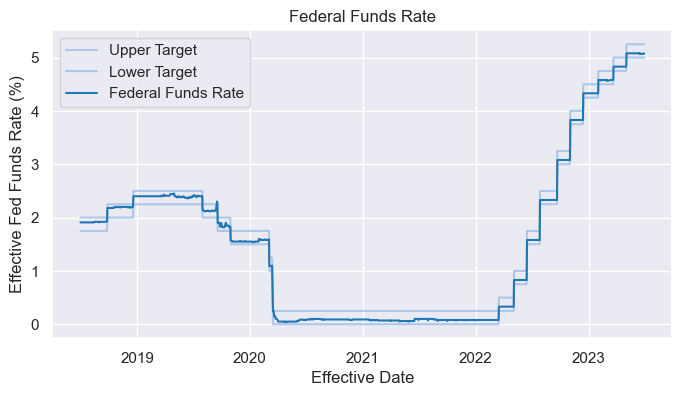

In [106]:
plt.figure(figsize = [8,4])
plt.plot(fed_funds["Effective Date"], fed_funds["Target Rate From (%)"], color = c20[1], label= "Upper Target")
plt.plot(fed_funds["Effective Date"], fed_funds["Target Rate To (%)"], color = c20[1], label = "Lower Target")
plt.plot(fed_funds["Effective Date"], fed_funds["Rate (%)"], color = c20[0], label = "Federal Funds Rate")
plt.xlabel("Effective Date")
plt.ylabel("Effective Fed Funds Rate (%)")
plt.title("Federal Funds Rate")
plt.legend()
plt.show()

In [107]:
yield_curve = pd.read_csv("yieldcurve.csv")
yield_curve["DATE"] = yield_curve["DATE"].apply(lambda x: pd.Timestamp(x))
yield_curve = yield_curve[yield_curve["DGS1"] != "."]
yield_curve["DGS1"] = yield_curve["DGS1"].apply(lambda x: float(x))
yield_curve["DGS2"] = yield_curve["DGS2"].apply(lambda x: float(x))
yield_curve["DGS3"] = yield_curve["DGS3"].apply(lambda x: float(x))
yield_curve["DGS5"] = yield_curve["DGS5"].apply(lambda x: float(x))
yield_curve["DGS7"] = yield_curve["DGS7"].apply(lambda x: float(x))
yield_curve["DGS10"] = yield_curve["DGS10"].apply(lambda x: float(x))
yield_curve["DGS30"] = yield_curve["DGS30"].apply(lambda x: float(x))
yield_curve.head()

,DATE,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30
0,2018-07-02,2.34,2.57,2.65,2.75,2.83,2.87,2.99
1,2018-07-03,2.33,2.53,2.63,2.72,2.79,2.83,2.96
3,2018-07-05,2.32,2.55,2.65,2.74,2.80,2.84,2.95
4,2018-07-06,2.34,2.53,2.64,2.71,2.78,2.82,2.94
5,2018-07-09,2.34,2.57,2.66,2.75,2.82,2.86,2.96


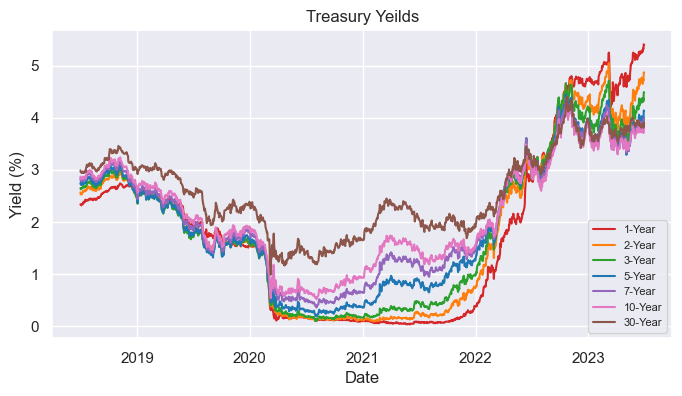

In [108]:
plt.figure(figsize = [8,4])
plt.plot(yield_curve["DATE"], yield_curve["DGS1"], label = "1-Year", color = c10[3])
plt.plot(yield_curve["DATE"], yield_curve["DGS2"], label = "2-Year", color = c10[1])
plt.plot(yield_curve["DATE"], yield_curve["DGS3"], label = "3-Year", color = c10[2])
plt.plot(yield_curve["DATE"], yield_curve["DGS5"], label = "5-Year", color = c10[0])
plt.plot(yield_curve["DATE"], yield_curve["DGS7"], label = "7-Year", color = c10[4])
plt.plot(yield_curve["DATE"], yield_curve["DGS10"], label = "10-Year", color = c10[6])
plt.plot(yield_curve["DATE"], yield_curve["DGS30"], label = "30-Year", color = c10[5])
plt.ylabel("Yield (%)")
plt.xlabel("Date")
plt.title("Treasury Yeilds")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [109]:
monthly_macro = pd.read_csv("Monthly.csv").dropna()
monthly_macro.columns = ["Date", "Unemployment", "CPI", "PCE", "IPI"]
monthly_macro["Date"] = monthly_macro["Date"].apply(lambda x: pd.Timestamp(x))
monthly_macro["Trading Date"] = pd.date_range("2018-07-01", "2023-07-01", freq='BMS')
monthly_macro.head()

,Date,Unemployment,CPI,PCE,IPI,Trading Date
0,2018-07-01,3.8,2.519634,5.36443,3.23564,2018-07-02
1,2018-08-01,3.8,2.432878,5.41122,4.43138,2018-08-01
2,2018-09-01,3.7,2.461933,4.47557,4.35959,2018-09-03
3,2018-10-01,3.8,2.414988,4.72653,2.91253,2018-10-01
4,2018-11-01,3.8,2.476794,4.59581,2.70690,2018-11-01


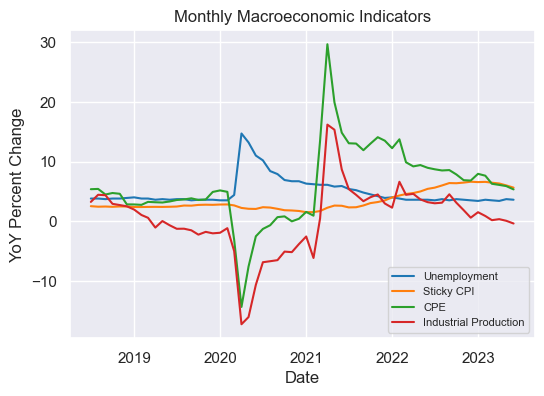

In [110]:
plt.figure(figsize = [6,4])
plt.plot(monthly_macro["Date"], monthly_macro["Unemployment"], label = "Unemployment", color = c10[0])
plt.plot(monthly_macro["Date"], monthly_macro["CPI"], label = "Sticky CPI", color = c10[1])
plt.plot(monthly_macro["Date"], monthly_macro["PCE"], label = "CPE", color = c10[2])
plt.plot(monthly_macro["Date"], monthly_macro["IPI"], label = "Industrial Production", color = c10[3])
plt.ylabel("YoY Percent Change")
plt.xlabel("Date")
plt.title("Monthly Macroeconomic Indicators")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [111]:
quarterly_macro = pd.read_csv("Quarterly.csv").dropna()
quarterly_macro.columns = ["Date", "GDP", "Real GDP per Capita"]
quarterly_macro["Date"] = quarterly_macro["Date"].apply(lambda x: pd.Timestamp(x))
quarterly_macro["Trading Date"] = pd.date_range("2018-07-01", "2023-07-01", freq='BMS')[::3]
quarterly_macro.head()

,Date,GDP,Real GDP per Capita,Trading Date
0,2018-07-01,1.05835,0.46628,2018-07-02
1,2018-10-01,0.57281,-0.00487,2018-10-01
2,2019-01-01,0.89046,0.43818,2019-01-01
3,2019-04-01,1.32980,0.71418,2019-04-01
4,2019-07-01,1.44732,0.98506,2019-07-01


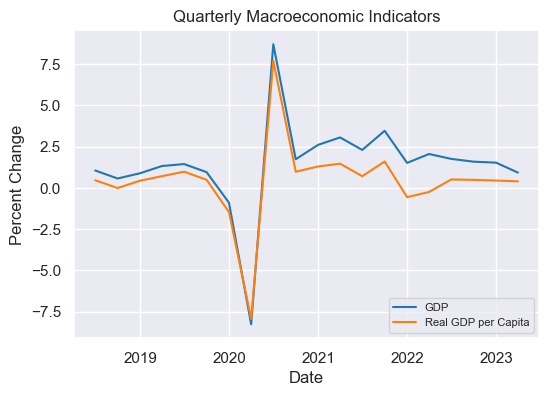

In [112]:
plt.figure(figsize = [6,4])
plt.plot(quarterly_macro["Date"], quarterly_macro["GDP"], label = "GDP", color = c10[0])
plt.plot(quarterly_macro["Date"], quarterly_macro["Real GDP per Capita"], label = "Real GDP per Capita", color = c10[1])
plt.ylabel("Percent Change")
plt.xlabel("Date")
plt.title("Quarterly Macroeconomic Indicators")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [113]:
macro_factors = pd.concat([fed_funds.set_index("Effective Date")[["Rate (%)", "Target Rate From (%)", "Target Rate To (%)"]],
                           yield_curve.set_index("DATE")], axis = 1)
macro_factors = macro_factors.ffill()
macro_factors.columns = ["EFFR", "Lower_Target", "Upper_Target", "1YRT", "2YRT", "3YRT", "5YRT", "7YRT", "10YRT", "30YRT" ]
macro_factors.head()

,EFFR,Lower_Target,Upper_Target,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT
2018-07-02,1.91,1.75,2.0,2.34,2.57,2.65,2.75,2.83,2.87,2.99
2018-07-03,1.91,1.75,2.0,2.33,2.53,2.63,2.72,2.79,2.83,2.96
2018-07-05,1.91,1.75,2.0,2.32,2.55,2.65,2.74,2.80,2.84,2.95
2018-07-06,1.91,1.75,2.0,2.34,2.53,2.64,2.71,2.78,2.82,2.94
2018-07-09,1.91,1.75,2.0,2.34,2.57,2.66,2.75,2.82,2.86,2.96


In [114]:
[i for i in df_close.index if i not in macro_factors.index]

[Timestamp('2018-10-08 00:00:00'),
 Timestamp('2018-11-12 00:00:00'),
 Timestamp('2019-10-14 00:00:00'),
 Timestamp('2019-11-11 00:00:00'),
 Timestamp('2020-10-12 00:00:00'),
 Timestamp('2020-11-11 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-11-11 00:00:00'),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-11-11 00:00:00')]

In [115]:
macro_factors.loc[pd.Timestamp("2018-10-08")] = macro_factors.loc[pd.Timestamp("2018-10-05")]
macro_factors.loc[pd.Timestamp("2018-11-12")] = macro_factors.loc[pd.Timestamp("2018-11-09")]
macro_factors.loc[pd.Timestamp("2019-10-14")] = macro_factors.loc[pd.Timestamp("2019-10-11")]
macro_factors.loc[pd.Timestamp("2019-11-11")] = macro_factors.loc[pd.Timestamp("2019-11-08")]
macro_factors.loc[pd.Timestamp("2020-10-12")] = macro_factors.loc[pd.Timestamp("2020-10-09")]
macro_factors.loc[pd.Timestamp("2020-11-11")] = macro_factors.loc[pd.Timestamp("2020-11-10")]
macro_factors.loc[pd.Timestamp("2021-10-11")] = macro_factors.loc[pd.Timestamp("2021-10-08")]
macro_factors.loc[pd.Timestamp("2021-11-11")] = macro_factors.loc[pd.Timestamp("2021-11-10")]
macro_factors.loc[pd.Timestamp("2022-10-10")] = macro_factors.loc[pd.Timestamp("2022-10-07")]
macro_factors.loc[pd.Timestamp("2022-11-11")] = macro_factors.loc[pd.Timestamp("2022-11-10")]

In [116]:
[i for i in macro_factors.index if i not in df_close.index]

[Timestamp('2018-12-05 00:00:00'),
 Timestamp('2019-04-19 00:00:00'),
 Timestamp('2020-04-10 00:00:00'),
 Timestamp('2020-07-03 00:00:00'),
 Timestamp('2021-04-02 00:00:00'),
 Timestamp('2021-12-24 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2023-04-07 00:00:00')]

In [117]:
macro_factors.loc[pd.Timestamp("2018-12-05")] = [None] * 10
macro_factors.loc[pd.Timestamp("2019-04-19")] = [None] * 10
macro_factors.loc[pd.Timestamp("2020-04-10")] = [None] * 10
macro_factors.loc[pd.Timestamp("2020-07-03")] = [None] * 10
macro_factors.loc[pd.Timestamp("2021-04-02")] = [None] * 10
macro_factors.loc[pd.Timestamp("2021-12-24")] = [None] * 10
macro_factors.loc[pd.Timestamp("2022-04-15")] = [None] * 10
macro_factors.loc[pd.Timestamp("2022-12-30")] = [None] * 10
macro_factors.loc[pd.Timestamp("2023-04-07")] = [None] * 10
macro_factors = macro_factors.dropna()

In [118]:
[i for i in df_close.index if i not in macro_factors.index]

[Timestamp('2022-12-30 00:00:00')]

In [119]:
[i for i in macro_factors.index if i not in df_close.index]

[]

In [120]:
macro_factors = macro_factors.sort_index().dropna()
macro_factors = macro_factors.ffill()
macro_factors = pd.concat([macro_factors, df_etfs[["SPY", "LQD"]]], axis = 1)
macro_factors.head()

,EFFR,Lower_Target,Upper_Target,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT,SPY,LQD
2018-07-02,1.91,1.75,2.0,2.34,2.57,2.65,2.75,2.83,2.87,2.99,271.859985,114.239998
2018-07-03,1.91,1.75,2.0,2.33,2.53,2.63,2.72,2.79,2.83,2.96,270.899994,114.660004
2018-07-05,1.91,1.75,2.0,2.32,2.55,2.65,2.74,2.80,2.84,2.95,273.109985,115.019997
2018-07-06,1.91,1.75,2.0,2.34,2.53,2.64,2.71,2.78,2.82,2.94,275.420013,115.180000
2018-07-09,1.91,1.75,2.0,2.34,2.57,2.66,2.75,2.82,2.86,2.96,277.899994,115.260002


In [121]:
macro_factors.index

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-05', '2018-07-06',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-16',
               ...
               '2023-06-16', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', length=1258, freq=None)

In [122]:
macro_factors.to_pickle("macro_factors.pkl")